#### DATA 620: Week 6
Daina Bouquin

In [17]:
import networkx as nx
import networkx.algorithms.bipartite as bi

In [51]:
# Instruction from: 
# https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

# project bipartite graph onto women nodes
W = bi.projected_graph(G, women)

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women, ratio=False)

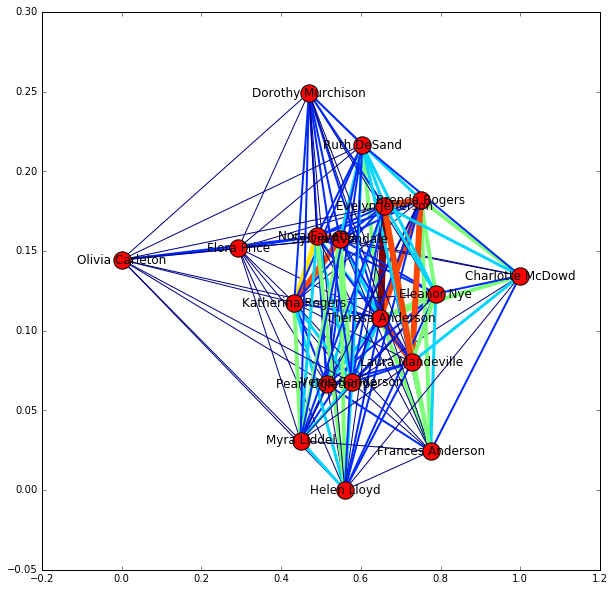

In [81]:
# Investigate the strength of the connections between the women (clubs)

# Weighted edges based on common clubs
# textbook: SNAS pg. 104
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)

In [99]:
# Find measures to further understand the subnetworks:
# Degree Centrality (nx) - centrality in the network

W_deg = nx.degree_centrality(W)
W_deg = {k:round(v,3) for k, v in W_deg.items()}

def sort_x(x):
    sort = sorted(x.iteritems(), key=lambda (k,v):(-v,k))
    return sort

W_deg = sort_x(W_deg)
W_deg

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.941),
 ('Katherina Rogers', 0.941),
 ('Myra Liddel', 0.941),
 ('Pearl Oglethorpe', 0.941),
 ('Brenda Rogers', 0.882),
 ('Eleanor Nye', 0.882),
 ('Frances Anderson', 0.882),
 ('Laura Mandeville', 0.882),
 ('Flora Price', 0.706),
 ('Olivia Carleton', 0.706),
 ('Charlotte McDowd', 0.647)]

In [37]:
# Now we'll look at the events instead of the women

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
events = G2.graph['top']

# project bipartite graph onto women nodes
e = bi.projected_graph(G2, women)

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
e = bi.weighted_projected_graph(G2, women, ratio=False)

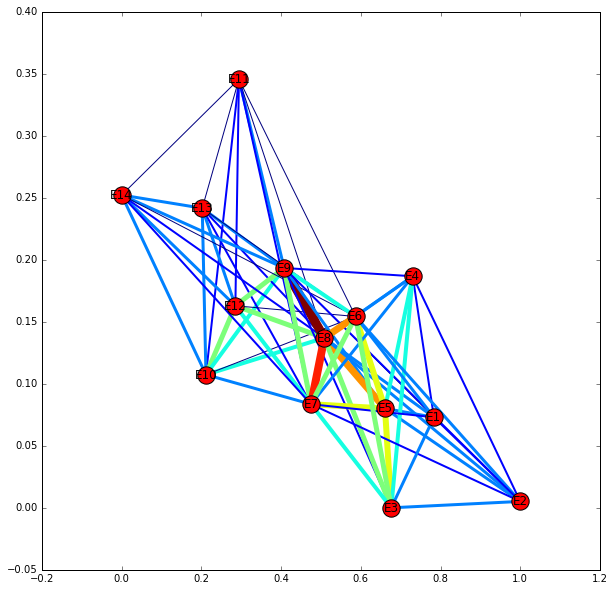

In [47]:
e.edges(data=True)
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(e, width=weights, edge_color=weights)

In [91]:
# Check out the degree (number of edges adjacent each node)
e_degree = nx.degree(e)
e_degree = {k:round(v,1) for k, v in e_degree.items()}
e_degree = sort_x(e_degree)
e_degree

[('E6', 13.0),
 ('E7', 13.0),
 ('E8', 13.0),
 ('E9', 13.0),
 ('E1', 8.0),
 ('E10', 8.0),
 ('E11', 8.0),
 ('E12', 8.0),
 ('E13', 8.0),
 ('E14', 8.0),
 ('E2', 8.0),
 ('E3', 8.0),
 ('E4', 8.0),
 ('E5', 8.0)]

From these two assessments, we understand that the network is exceptionally centralized and closed. A few groups of women attended almost all of the same events, and there are some women who attended many events. There are also few events where nearly all of the women were in attendence.